# Connectionist Models of Cognition

- Please work in groups of two or more and **help your group members**.

- Feel free to ask the instructor **questions** as you go.

- Commit and show an instructor your work before leaving.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import *

### General Models of Learning

So far in this class, we've discussed both mental representations and cognitive processes, but we haven't said much about where these two components of the mind might come from in the first place.

Understanding how the mind **learns** to represent the world and solve very different kinds of problems requires a *general* theory of learning that could apply just as much to say categorization as it does to decision making.

For one possible such theory, we can take inspiration from what the mind physically uses to accomplish everything it does: the brain.

### Computing Units of the Brain

<div>
<img width=300 style="float:right;margin-right:40px;margin-left:20px" src="https://i.pinimg.com/736x/a3/d8/72/a3d872bcf7126dcb6fdc04362187e2e7.jpg">

In the late 19th century, Camillo Golgi figured out for the first time how to visualize structure of cells—called **neurons**—that make up the brain. One original such visualization is shown on the right, and reveals that neurons are cells with long "branches" connecting themselves to other neurons.

Later work by several researchers revealed that neurons communicate with each other using electrical signals. The diagram below shows the basic structure of a neuron.

<img width=300 style="" src="neuron.jpg">

A neuron receives multiple **input signals** through connections to other neurons called **dendrites**. The strength of each of these connections varies, and thus some signals have more influence than others. The neuron then integrates (sums) all these strength-weighted signals in its **cell body**. It then transmits that one integrated signal to other neurons via its **axon**. In simpler terms, information flows from left to right.
</div>

### Modeling Neurons

Most of the above components of biological neurons are relatively easy to model.

- For example, we can model the $i$-th input signal as a number $x_i$

- Then, we can model the strength of the connection to the $i$-th input as $w_i$

- The actual input to a neuron is then the original input $x_i$ weighted by $w_i$, giving the product $x_i w_i$.

The stronger the signal received by the neuron, the more we say it is **activated**. 

We can model the activation of a single neuron with a single input as: $$a = x_1 w_1$$

We can visualize this artificial neuron as:

<div style="text-align:center;">
    <svg width="300" height="150" viewBox="0 0 300 150" transform="scale(2, 2)">
        <!-- Input -->
        <text x="10" y="70" font-size="12" fill="black">x₁ (input)</text>
        <line x1="50" y1="75" x2="100" y2="75" stroke="black" stroke-width="2" />
        <!-- Weight -->
        <text x="75" y="65" font-size="12" fill="black">w₁</text>
        <!-- Cell Body -->
        <circle cx="120" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <!-- <text x="110" y="80" font-size="12" fill="black">Σ</text> -->
        <!-- Output -->
        <line x1="140" y1="75" x2="200" y2="75" stroke="black" stroke-width="2" />
        <text x="210" y="80" font-size="12" fill="black">a (output)</text>
    </svg>
</div>

**Exercise:** Create a model of a neuron using a function called `neuron_with_one_input` that takes a single input as the first argument and a single weight as the second argument and returns the activation of that neuron.

In [144]:
# Your code here

def neuron_with_one_input(input, weight):
    return input * weight

In [145]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(neuron_with_one_input(0.5, 0.5), 0.25) else 'Test failed'

'Test passed'

**Exercise:** Calculate the activation value of a neuron with an input signal value of 0.9 and a connection strength weight of 0.5. Store the result in `activation_with_one_input`.

In [146]:
# Your code here

activation_with_one_input = neuron_with_one_input(0.9, 0.5)

# don't change
activation_with_one_input

0.45

In [147]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(activation_with_one_input, 0.45) else 'Test failed'

'Test passed'

In real neurons, signals can either **excite** the neuron (increase its activation value), or **inhibit** the neuron (decrease its activation value). We can model excitation versus inhibition using positive and negative weights respectively.

**Exercise:** Calculate the activation value of a neuron with an input signal value of 0.9 and an inhibitory connection strength weight of -0.5. Store the result in `activation_after_inhibition`.

In [148]:
# Your code here

activation_after_inhibition = neuron_with_one_input(0.9, -0.5)

# don't change
activation_after_inhibition

-0.45

In [149]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(activation_after_inhibition, -0.45) else 'Test failed'

'Test passed'

Another important feature of real neurons is that they don't always activate. Instead, input signals are accumulated until they reach a particular threshold. Once that threshold is met, the neuron activates, triggering communication with other neurons.

We can describe this kind of activation pattern using what is called an **activation function**, or $\phi$.

In particular, we can define our activation function as the "step" function:

$$
\phi(z) =
\begin{cases} 
0 & \text{if } z < t \\
1 & \text{if } z \geq t
\end{cases},
$$

where $z = x_1 * w_1$ and $t$ is an activation threshold.

That is, when the excitation of the neuron is less than $t$, the neuron outputs 0. When equal to or greater than $t$, it outputs 1.

**Exercise:** Create a function called `step_function` that `z` and `t` as input and returns $\phi(z)$.

In [150]:
# Your code here

def step_function(z, t):
    return 0 if z < t else 1

In [151]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(step_function(0.5, 0.5), 1) else 'Test failed'

'Test passed'

The function $\phi$ is visualized below for a threshold of 2. Notice why it's called a "step" function. The part of the function that is a vertical line marks the position of the threshold.

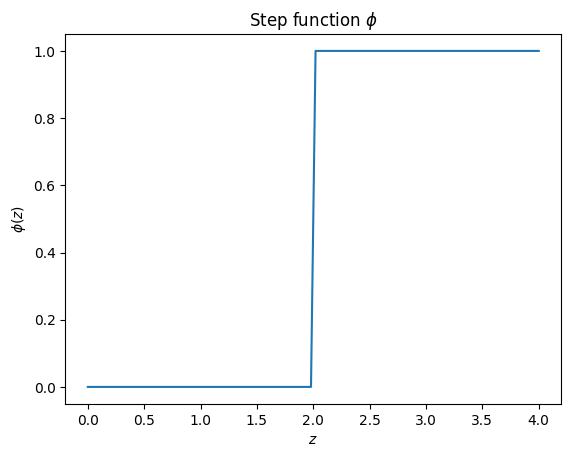

In [152]:
plot_step_function(step_function)

The final activation of a neuron is then redefined as: $$a = \phi(x_1 w_1).$$

That is, our artificial neuron outputs 1 when the weighted input signal is "high enough", and 0 otherwise.

Our diagram is now:

<div style="text-align:center;">
    <svg width="400" height="150" viewBox="0 0 400 150" transform="scale(2, 2)">
        <!-- Input -->
        <text x="10" y="70" font-size="12" fill="black">x₁ (input)</text>
        <line x1="50" y1="75" x2="100" y2="75" stroke="black" stroke-width="2" />
        <!-- Weight -->
        <text x="75" y="65" font-size="12" fill="black">w₁</text>
        <!-- Cell Body -->
        <circle cx="120" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <!-- Line to Phi -->
        <line x1="140" y1="75" x2="170" y2="75" stroke="black" stroke-width="2" />
        <!-- Phi Circle -->
        <circle cx="190" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="185" y="80" font-size="12" fill="black">φ</text>
        <!-- Line to Output -->
        <line x1="210" y1="75" x2="240" y2="75" stroke="black" stroke-width="2" />
        <!-- Output -->
        <text x="250" y="80" font-size="12" fill="black">a (output)</text>
    </svg>
</div>

**Exercise:** Create a model of a neuron using a function called `neuron_with_step_act` that takes in an input, a weight, and a threshold and returns the activation of that neuron.

In [153]:
# Your code here

def neuron_with_step_act(input, weight, threshold):
    activation = neuron_with_one_input(input, weight)
    return step_function(activation, threshold)

In [154]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(neuron_with_step_act(2, 0.5, 1), 1) else 'Test failed'

'Test passed'

**Exercise:** Fill in the blanks below such that the output of the neuron will be 1.

In [155]:
output_that_should_be_one = neuron_with_step_act(0.9, 1, 0)

# do not change
output_that_should_be_one

1

In [156]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(output_that_should_be_one, 1) else 'Test failed'

'Test passed'

**Exercise:** Fill in the blanks below such that the output of the neuron will be 0.

In [157]:
output_that_should_be_zero = neuron_with_step_act(0.9, 1, 1)

# do not change
output_that_should_be_zero

0

In [158]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(output_that_should_be_zero, 0) else 'Test failed'

'Test passed'

The last important property of real neurons that we haven't yet modeled is the integration of multiple signals.

Multiple input signals just means multiple values $x_i$ and corresponding weights $w_i$. As we said before, these signals are integrated with a simple sum, implying a modified activation rule as follows: $$a = \phi(\sum_i x_i w_i).$$

This simplified model of a neuron is called a **perceptron**, and was invented by the psychologist Frank Rosenblatt in 1957.

For a simple example of two inputs, we can write: $$a = \phi(x_1 w_1 + x_2 w_2).$$

We can visualize this neuron as:

<div style="text-align:center;">
    <br><br>
    <svg width="400" height="220" viewBox="0 0 400 200" transform="scale(2, 2)">
        <!-- First Input -->
        <text x="10" y="50" font-size="12" fill="black">x₁ (input)</text>
        <line x1="50" y1="55" x2="100" y2="75" stroke="black" stroke-width="2" />
        <!-- First Weight -->
        <text x="65" y="55" font-size="12" fill="black">w₁</text>
        <!-- Second Input -->
        <text x="10" y="112" font-size="12" fill="black">x₂ (input)</text>
        <line x1="50" y1="100" x2="100" y2="85" stroke="black" stroke-width="2" />
        <!-- Second Weight -->
        <text x="65" y="105" font-size="12" fill="black">w₂</text>
        <!-- Cell Body with Summation -->
        <circle cx="120" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="113" y="80" font-size="16" fill="black">Σ</text>
        <!-- Line to Phi -->
        <line x1="140" y1="75" x2="170" y2="75" stroke="black" stroke-width="2" />
        <!-- Phi Circle -->
        <circle cx="190" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="185" y="80" font-size="12" fill="black">φ</text>
        <!-- Line to Output -->
        <line x1="210" y1="75" x2="240" y2="75" stroke="black" stroke-width="2" />
        <!-- Output -->
        <text x="250" y="80" font-size="12" fill="black">a (output)</text>
    </svg>
</div>

**Exercise:** Create a model of a neuron using a function called `neuron_with_two_inputs` that takes in two inputs, two weights, and a threshold and returns the activation of that neuron.

In [159]:
# Your code here

def neuron_with_two_inputs(input1, input2, weight1, weight2, threshold):
    activations = neuron_with_one_input(input1, weight1) + neuron_with_one_input(input2, weight2)
    return step_function(activations, threshold)

In [160]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(neuron_with_two_inputs(0.5, 1, 2, 1.5, 3.6), 0) else 'Test failed'

'Test passed'

Now that we have a complete model of a neuron (the perceptron), let's see how we can use it to model a cognitive process of learning.

Let's revisit the problem of learning to categorize a set of stimuli. In the dataframe below, each row is a stimulus (4 total), the first two columns (`feature1` and `feature2`) are (binary) features of those stimuli, and the final column (`category`) is the true category label that needs to be learned.

In [161]:
df_cat = pd.DataFrame({
    'feature1': [0, 0, 1, 1],
    'feature2': [0, 1, 0, 1],
    'category': [0, 0, 0, 1]
})
df_cat

,feature1,feature2,category
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


We can visualize these stimuli below. Note that feature 1 represents the color of the stimulus, whereas feature 2 represents the shape of the stimulus.

Also note that there is one example of category 1, and three examples of category 0.

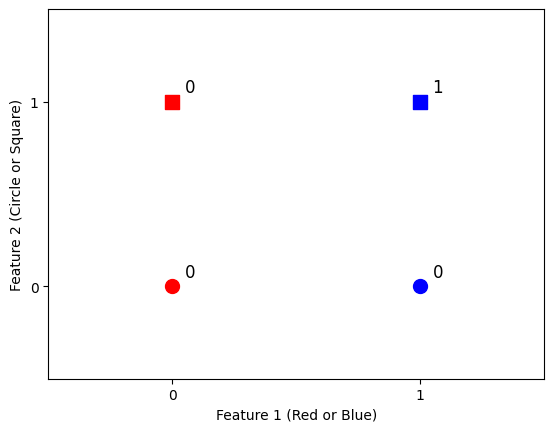

In [162]:
plot_stimuli(df_cat)

Previously, we used categorization models to learn to categorize such stimuli. In contrast, here we will employ the perceptron as a basic model of learning to solve the same problem.

Note that we want a model that can take in stimuli (`feature1` and `feature2` value pairs) and output category labels. To accomplish this, note that we can use `feature1` and `feature2` as the inputs to the perceptron. We already know that the output of the perceptron is 0 or 1 because of the step function, so we know it outputs some kind of guess for the category label (which can also only be 0 or 1).

Taking the second stimulus as our example (feature1=0, feature2=1), we can model categorization as: $$\text{predicted category label } \hat{y} = \phi(0\times w_1 + 1\times w_2).$$

What kind of guess for the category label of stimulus 2 will the above spit out? Let's see.

**Exercise:** Fill in the blanks to categorize stimulus 2. We'll need to pick some values for the weights and the threshold, so use 1 for all three.

In [163]:
# do not change
# inputs for stimulus 2
x1 = df_cat['feature1'].values[1]
x2 = df_cat['feature2'].values[1]

predicted_y = neuron_with_two_inputs(x1, x2, 1, 1, 1)

# do not change
predicted_y

1

In [164]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(predicted_y, 1) else 'Test failed'

'Test passed'

The above gave an output of 1 instead of what we wanted (0). 

The reason is that, in addition to the inputs, the output of the perceptron depends on both the values of the weights and the value of the threshold. The process of finding the best values for these parameters (i.e., that helps us categorize correctly) is what define the process of **learning** in a perceptron.

### The Perceptron Learning Algorithm

Before the perceptron can start learning, it needs start with some set of initial values for $w_1$, $w_2$, and $t$. We can set them all for example at 0.1 to start.

The next step is to evaluate the outputs of the model. For example, if the true label $y$ for some stimulus is $1$, but the perceptron outputs $0$, then we say that it has made an **error**. We can measure this error as $y - ŷ$, and this quantity tells us how we should modify our weights:

- If $y - ŷ = 0$, then the model categorized correctly, and we don't need to update the weights.
- If $y - ŷ = 1$, then the perceptron didn't activate when it was supposed to, and we need to increase weights to increase activation.
- If $y - ŷ = -1$, then the perceptron activated when it wasn't supposed to, and we need to decrease weights to decrease activation.

The process of updating the weight strengths that connect neurons is called **error-driven learning**.

When we do increase or decrease a weight, we adjust it proportionally to its corresponding input $x$ because inputs with larger magnitudes contribute more to whatever error was made. Further, we only want to make small changes to weights at any one time so we don't overdo it. Thus, rather than updating exactly proportionally to $x$, we update by a small fixed proportion of $x$, or $ηx$, where $\eta$ is called the **learning rate**.

We can write out the full rule for updating some weight $w_{\text{old}}$ to $w_{\text{new}}$ as: $$w_{\text{new}} = w_{\text{old}} + η(y - ŷ)x.$$

Let's implement it.

**Exercise:** Create a function called `update_weight` that takes a single `old_weight`, `eta`, a single input `x`, `y`, and `predicted_y`, and outputs the new updated weight.

In [165]:
# Your code here

def update_weight(old_weight, eta, x, y, predicted_y):
    return old_weight + eta*(y - predicted_y)*x

In [166]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(update_weight(0.5, 0.1, 1, 1, 0), 0.6) else 'Test failed'

'Test passed'

The final parameter we have to update is the threshold $t$. We do that using a very similar rule:

$$t_{\text{new}} = t_{\text{old}} - η(y - ŷ)$$

There are two differences in this update rule as compared to the weight update rule. First, there is a sign flip. This is because it is *smaller* thresholds that cause the neuron to activate more easily, not larger ones (whereas in contrast it is *larger* weights that push the neuron towards activation). Second, it is not a function of any input $x$ because the threshold is independent of the inputs.

Let's implement this rule as well.

**Exercise:** Create a function called `update_threshold` that takes `old_threshold`, `eta`, `y`, and `predicted_y`, and outputs the new updated threshold.

In [167]:
# Your code here

def update_threshold(old_threshold, eta, y, predicted_y):
    return old_threshold - eta*(y - predicted_y)

In [168]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(update_threshold(0.5, 0.1, 1, 0), 0.4) else 'Test failed'

'Test passed'

The final learning algorithm for two weights is as follows:
1. Initialize both weights as well as the threshold
2. For each stimulus, we check if the perceptron gives the correct output
3. If not, update both weights and the threshold
4. Go back to 2 and repeat until accuracy stops increasing

Before we can implement this algorithm, let's create a function to evaluate the accuracy of a perceptron in categorizing the stimuli in our dataset.

**Exercise:** Fill in the blanks below.

In [169]:
def evaluate_accuracy(df, weight1, weight2, t):

    # to counter #/4 we get right
    correct_predictions = 0

    # go through each of the four stimuli
    for _, row in df.iterrows():

        # features and correct category for this stimulus
        x1 = row['feature1']
        x2 = row['feature2']
        y = row['category']

        # see what the perceptron outputs for this stimulus
        y_pred = neuron_with_two_inputs(x1, x2, weight1, weight2, t)

        # if the prediction is correct, tally it up
        if y_pred == y:
            correct_predictions = correct_predictions + 1
    
    # return the accuracy %
    accuracy = correct_predictions / len(df) * 100
    return accuracy

In [170]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(evaluate_accuracy(df_cat, 1, 1, 1), 50) else 'Test failed'

'Test passed'

Now, let's implement the entire perceptron learning algorithm.

**Exercise:** Fill in the blanks below. Set the learning rate to 0.1.

In [171]:
def fit_perceptron(df):

    # initial values before learning
    curr_w1 = 0.1
    curr_w2 = 0.1
    curr_t = 0.1

    eta = 0.1

    # keep learning until all four stimuli are classified correctly
    for learning_iteration in range(100):
        correct_predictions = 0

        # go through each of the four stimuli
        for _, row in df.iterrows():

            # features and correct category for this stimulus
            x1 = row['feature1']
            x2 = row['feature2']
            y = row['category']
            
            # see what the perceptron outputs for this stimulus
            y_pred = neuron_with_two_inputs(x1, x2, curr_w1, curr_w2, curr_t)
            
            # if incorrect, update weights and threshold
            if y_pred != y:
                curr_w1 = update_weight(curr_w1, eta, x1, y, y_pred)
                curr_w2 = update_weight(curr_w2, eta, x2, y, y_pred)
                curr_t  = update_threshold(curr_t, eta, y, y_pred)

            # round params to remove floating point error
            curr_w1, curr_w2, curr_t = round(curr_w1, 2), round(curr_w2, 2), round(curr_t, 2)

            # check the accuracy after the parameter updates
            if y_pred == y:
                correct_predictions = correct_predictions + 1
            current_accuracy = correct_predictions / len(df) * 100
            
            # print current parameters and accuracy
            print(f'w1: {curr_w1}, w2: {curr_w2}, t: {curr_t}, Accuracy: {current_accuracy:.0f}%')

            # exit once all four stimuli are classified correctly
            if np.isclose(current_accuracy, 100.00):
                return curr_w1, curr_w2, curr_t
            
    return None, None, None

best_w1, best_w2, best_t = fit_perceptron(df_cat)

w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 25%
w1: 0.1, w2: 0.0, t: 0.2, Accuracy: 25%
w1: 0.1, w2: 0.0, t: 0.2, Accuracy: 50%
w1: 0.2, w2: 0.1, t: 0.1, Accuracy: 50%
w1: 0.2, w2: 0.1, t: 0.1, Accuracy: 25%
w1: 0.2, w2: 0.0, t: 0.2, Accuracy: 25%
w1: 0.1, w2: 0.0, t: 0.3, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.2, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.2, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.2, Accuracy: 50%
w1: 0.1, w2: 0.1, t: 0.3, Accuracy: 50%
w1: 0.2, w2: 0.2, t: 0.2, Accuracy: 50%
w1: 0.2, w2: 0.2, t: 0.2, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 50%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 75%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 25%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 50%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 75%
w1: 0.2, w2: 0.1, t: 0.3, Accuracy: 100%


In [172]:
# TEST YOUR SOLUTION
'Test passed' if (best_w1, best_w2, best_t) == (0.2, 0.1, 0.3) else 'Test failed'

'Test passed'

Notice that, while learning, the perceptron sometimes "changes its mind". For example, the first weight often moves back and forth between 0.1 and 0.2. 

Also notice that, eventually, accuracy reaches 100% (all four stimuli have been correctly categorized by the perceptron) and thus no more learning (parameter updating) is required.

Let's think about what this means for a second. The perceptron learned to categorize stimuli without any explicit starting knowledge about prototypes or memory storage.

The categorization model we learned can be visualized as:

<div style="text-align:center;">
    <br><br>
    <svg width="400" height="220" viewBox="0 0 400 200" transform="scale(2, 2)">
        <!-- First Input -->
        <text x="10" y="50" font-size="12" fill="black">x₁ (input)</text>
        <line x1="50" y1="55" x2="100" y2="75" stroke="black" stroke-width="2" />
        <!-- First Weight -->
        <text x="65" y="55" font-size="12" fill="black">0.2</text>
        <!-- Second Input -->
        <text x="10" y="116" font-size="12" fill="black">x₂ (input)</text>
        <line x1="50" y1="105" x2="100" y2="85" stroke="black" stroke-width="2" />
        <!-- Second Weight -->
        <text x="65" y="110" font-size="12" fill="black">0.1</text>
        <!-- Cell Body with Summation -->
        <circle cx="120" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="113" y="80" font-size="16" fill="black">Σ</text>
        <!-- Line to Phi -->
        <line x1="140" y1="75" x2="170" y2="75" stroke="black" stroke-width="2" />
        <!-- Phi Circle -->
        <circle cx="190" cy="75" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="185" y="80" font-size="12" fill="black">φ</text>
        <text x="175" y="50" font-size="12" fill="black">t=0.3</text>
        <!-- Line to Output -->
        <line x1="210" y1="75" x2="240" y2="75" stroke="black" stroke-width="2" />
        <!-- Output -->
        <text x="250" y="80" font-size="12" fill="black">a (output)</text>
    </svg>
</div>

Importantly, the perceptron didn't just learn any pair of categories, it learned a specific pair. To see what is meant by this, let's look at the data again:

In [173]:
df_cat

,feature1,feature2,category
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


Observe that the only stimulus labeled as category 1 is the one where both feature1 and feature2 are both 1. This means that category 1 is defined by a strict rule: an exemplar is a member of category 1 only if both feature1 AND feature2 are 1. Otherwise, it is a member of category 0.

This kind of category can also be modeled using what is called a **logical operator**. If we call this operator the **AND** operator, then:
- $0 \text{  AND  } 0 = 0$
- $0 \text{  AND  } 1 = 0$
- $1 \text{  AND  } 0 = 0$
- $1 \text{  AND  } 1 = 1$

This pattern recreates our dataset exactly.

In 1854, a mathematician named George Boole defined this **boolean operator** (along with several others) in a book called "The Laws of Thought". That is, Boole, like Aristotle, was trying to provide a mathematical model of how people think logically (think about thoughts like "I can go to college only if I both get accepted AND have the money"). His contribution also ended up being a major foundation of computer science.

What we now know is that the perceptron can implement this operator, but more importantly, **it can learn how to implement this logic without being explicitly how to do so!**

### Learning other sets of categories

Another operator called the **OR** operator outputs 1 when at least one of the inputs is 1 (one "or" the other). We can represent its behavior using another two-category dataset like the below:

In [174]:
df_or = pd.DataFrame({
    'feature1': [0, 0, 1, 1],
    'feature2': [0, 1, 0, 1],
    'category': [0, 1, 1, 1]
})
df_or

,feature1,feature2,category
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


Let's run the learning algorithm on it and see what happens.

**Exercise:** Fill in the blanks.

In [175]:
or_w1, or_w2, or_t = fit_perceptron(df_or)

w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 25%
w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 50%
w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 75%
w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 100%


In [176]:
# TEST YOUR SOLUTION
'Test passed' if (or_w1, or_w2, or_t) == (0.1, 0.1, 0.1) else 'Test failed'

'Test passed'

This time, we got lucky. Not only can the perceptron apparently implement the OR operator, it was able to do it using the starting parameters (0.1, 0.1, 0.1). Note that if we had started with different parameters that weren't quite so lucky, learning would still have to take place.

Let's try another operator, called the **NAND** operator, which really just the "opposite" of the AND operator. That is, it outputs 1 in all cases, except for when both inputs are 1.

In [177]:
df_nand = pd.DataFrame({
    'feature1': [0, 0, 1, 1],
    'feature2': [0, 1, 0, 1],
    'category': [1, 1, 1, 0]
})
df_nand

,feature1,feature2,category
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


**Exercise:** Fill in the blanks below.

In [178]:
nand_w1, nand_w2, nand_t = fit_perceptron(df_nand)

w1: 0.1, w2: 0.1, t: 0.0, Accuracy: 0%
w1: 0.1, w2: 0.1, t: 0.0, Accuracy: 25%
w1: 0.1, w2: 0.1, t: 0.0, Accuracy: 50%
w1: 0.0, w2: 0.0, t: 0.1, Accuracy: 50%
w1: 0.0, w2: 0.0, t: 0.0, Accuracy: 0%
w1: 0.0, w2: 0.0, t: 0.0, Accuracy: 25%
w1: 0.0, w2: 0.0, t: 0.0, Accuracy: 50%
w1: -0.1, w2: -0.1, t: 0.1, Accuracy: 50%
w1: -0.1, w2: -0.1, t: 0.0, Accuracy: 0%
w1: -0.1, w2: 0.0, t: -0.1, Accuracy: 0%
w1: -0.1, w2: 0.0, t: -0.1, Accuracy: 25%
w1: -0.2, w2: -0.1, t: 0.0, Accuracy: 25%
w1: -0.2, w2: -0.1, t: 0.0, Accuracy: 25%
w1: -0.2, w2: 0.0, t: -0.1, Accuracy: 25%
w1: -0.1, w2: 0.0, t: -0.2, Accuracy: 25%
w1: -0.2, w2: -0.1, t: -0.1, Accuracy: 25%
w1: -0.2, w2: -0.1, t: -0.1, Accuracy: 25%
w1: -0.2, w2: -0.1, t: -0.1, Accuracy: 50%
w1: -0.1, w2: -0.1, t: -0.2, Accuracy: 50%
w1: -0.2, w2: -0.2, t: -0.1, Accuracy: 50%
w1: -0.2, w2: -0.2, t: -0.1, Accuracy: 25%
w1: -0.2, w2: -0.1, t: -0.2, Accuracy: 25%
w1: -0.2, w2: -0.1, t: -0.2, Accuracy: 50%
w1: -0.2, w2: -0.1, t: -0.2, Accuracy: 75%
w

In [179]:
# TEST YOUR SOLUTION
'Test passed' if (nand_w1, nand_w2, nand_t) == (-0.2, -0.1, -0.2) else 'Test failed'

'Test passed'

Yet again, the perceptron was able to learn this operator, though it took a bit more learning. Also notice that this is the first perceptron that made use of negative (inhibitory) weights.

Let's try one last operator, the **XOR** operator, which stands for "exclusive OR". This operator returns 1 when exactly one input is equal to 1, but not when both inputs are 1.

In [180]:
df_xor = pd.DataFrame({
    'feature1': [0, 0, 1, 1],
    'feature2': [0, 1, 0, 1],
    'category': [0, 1, 1, 0]
})
df_xor

,feature1,feature2,category
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


**Exercise:** Fill in the blanks below.

In [181]:
xor_w1, xor_w2, xor_t = fit_perceptron(df_xor)

w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 25%
w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 50%
w1: 0.1, w2: 0.1, t: 0.1, Accuracy: 75%
w1: 0.0, w2: 0.0, t: 0.2, Accuracy: 75%
w1: 0.0, w2: 0.0, t: 0.2, Accuracy: 25%
w1: 0.0, w2: 0.1, t: 0.1, Accuracy: 25%
w1: 0.1, w2: 0.1, t: 0.0, Accuracy: 25%
w1: 0.0, w2: 0.0, t: 0.1, Accuracy: 25%
w1: 0.0, w2: 0.0, t: 0.1, Accuracy: 25%
w1: 0.0, w2: 0.1, t: 0.0, Accuracy: 25%
w1: 0.0, w2: 0.1, t: 0.0, Accuracy: 50%
w1: -0.1, w2: 0.0, t: 0.1, Accuracy: 50%
w1: -0.1, w2: 0.0, t: 0.1, Accuracy: 25%
w1: -0.1, w2: 0.1, t: 0.0, Accuracy: 25%
w1: 0.0, w2: 0.1, t: -0.1, Accuracy: 25%
w1: -0.1, w2: 0.0, t: 0.0, Accuracy: 25%
w1: -0.1, w2: 0.0, t: 0.1, Accuracy: 0%
w1: -0.1, w2: 0.1, t: 0.0, Accuracy: 0%
w1: 0.0, w2: 0.1, t: -0.1, Accuracy: 0%
w1: -0.1, w2: 0.0, t: 0.0, Accuracy: 0%
w1: -0.1, w2: 0.0, t: 0.1, Accuracy: 0%
w1: -0.1, w2: 0.1, t: 0.0, Accuracy: 0%
w1: 0.0, w2: 0.1, t: -0.1, Accuracy: 0%
w1: -0.1, w2: 0.0, t: 0.0, Accuracy: 0%
w1: -0.1, w2: 0.0, t: 0.1, Accuracy

In [182]:
# TEST YOUR SOLUTION
'Test passed' if (xor_w1, xor_w2, xor_t) == (None, None, None) else 'Test failed'

'Test passed'

Unfortunately, the perceptron didn't seem successful this time!

The final accuracy (after 100 passes through the data) is still not 100%. It turns out that additional learning doesn't help.

In 1969, Marvin Minsky and Seymour Papert proved that perceptrons can't learn such operators. However, that setback is not quite the end of the road for perceptrons.

An important feature of boolean operators is that they can be combined. For example, the XOR operator can be built from a combination of the others:

$$x_1\text{ XOR }x_2 = (x_1 \text{ OR } x_2) \text{ AND } (x_1 \text{ NAND } x_2).$$

Let's confirm this.

**Exercise:** In the below dataframe, fill in the `'OR'` and `'NAND'` columns with respect to feature 1 and feature 2 as inputs. Then, fill in the final `'OR AND NAND'` column based on the filled `'OR'` and `'NAND'` columns.

In [188]:
df_xor2 = pd.DataFrame({
    'feature1':    [0, 0, 1, 1],
    'feature2':    [0, 1, 0, 1],
    'OR':          [0, 1, 1, 1],
    'NAND':        [1, 1, 1, 0],
    'OR AND NAND': [0, 1, 1, 0],
})
df_xor2

,feature1,feature2,OR,NAND,OR AND NAND
0,0,0,0,1,0
1,0,1,1,1,1
2,1,0,1,1,1
3,1,1,1,0,0


In [189]:
# TEST YOUR SOLUTION
cond1 = (df_xor2['OR'] == df_or['category']).all()
cond2 = (df_xor2['NAND'] == df_nand['category']).all()
cond3 = (df_xor2['OR AND NAND'] == df_xor['category']).all()
'Test passed' if (cond1 and cond2 and cond3) else 'Test failed'

'Test passed'

While a single perceptron won't do, what the above implies is that we can combine multiple perceptrons together to solve more complex problems. For example, we can combine the perceptrons that have learned AND, OR, and NAND, to implement XOR. This seems perfectly fair to do, since after all, the brain contains billions of neurons, not just one.

We can visualize the set of neurons that solves the XOR problem as:

<div style="text-align:center;">
    <br><br>
    <svg width="600" height="320" viewBox="0 0 600 300" transform="scale(1.5, 1.5)">
        <!-- Input Layer -->
        <text x="10" y="100" font-size="12" fill="black">x₁ (input)</text>
        <text x="10" y="200" font-size="12" fill="black">x₂ (input)</text>
        <!-- Connections to OR Neuron -->
        <line x1="70" y1="100" x2="150" y2="80" stroke="black" stroke-width="2" />
        <line x1="70" y1="200" x2="150" y2="80" stroke="black" stroke-width="2" />
        <!-- <text x="100" y="80" font-size="12" fill="black">0.1</text> -->
        <!-- <text x="100" y="180" font-size="12" fill="black">0.1</text> -->
        <!-- Connections to NAND Neuron -->
        <line x1="70" y1="100" x2="150" y2="220" stroke="black" stroke-width="2" />
        <line x1="70" y1="200" x2="150" y2="220" stroke="black" stroke-width="2" />
        <!-- <text x="100" y="140" font-size="12" fill="black">-0.1</text> -->
        <!-- <text x="100" y="220" font-size="12" fill="black">-0.1</text> -->
        <!-- OR Neuron -->
        <circle cx="170" cy="80" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="163" y="85" font-size="16" fill="black">Σ</text>
        <line x1="190" y1="80" x2="220" y2="80" stroke="black" stroke-width="2" />
        <circle cx="240" cy="80" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="235" y="85" font-size="12" fill="black">φ</text>
        <!-- <text x="225" y="55" font-size="12" fill="black">t=0.1</text> -->
        <!-- <text x="245" y="40" font-size="12" fill="black">"OR"</text> -->
        <text x="245" y="55" font-size="12" fill="black">"OR"</text>
        <!-- NAND Neuron -->
        <circle cx="170" cy="220" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="163" y="225" font-size="16" fill="black">Σ</text>
        <line x1="190" y1="220" x2="220" y2="220" stroke="black" stroke-width="2" />
        <circle cx="240" cy="220" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="235" y="225" font-size="12" fill="black">φ</text>
        <!-- <text x="225" y="195" font-size="12" fill="black">t=0.0</text> -->
        <!-- <text x="245" y="260" font-size="12" fill="black">"NAND"</text> -->
        <text x="245" y="255" font-size="12" fill="black">"NAND"</text>
        <!-- Connections to AND (Output) Neuron -->
        <line x1="260" y1="80" x2="350" y2="150" stroke="black" stroke-width="2" />
        <line x1="260" y1="220" x2="350" y2="150" stroke="black" stroke-width="2" />
        <!-- <text x="300" y="100" font-size="12" fill="black">0.2</text> -->
        <!-- <text x="300" y="200" font-size="12" fill="black">0.2</text> -->
        <!-- AND (Output) Neuron -->
        <circle cx="370" cy="150" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="363" y="155" font-size="16" fill="black">Σ</text>
        <line x1="390" y1="150" x2="420" y2="150" stroke="black" stroke-width="2" />
        <circle cx="440" cy="150" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="435" y="155" font-size="12" fill="black">φ</text>
        <!-- <text x="425" y="125" font-size="12" fill="black">t=0.3</text> -->
        <text x="445" y="190" font-size="12" fill="black">"AND"</text>
        <!-- Output -->
        <line x1="460" y1="150" x2="500" y2="150" stroke="black" stroke-width="2" />
        <text x="510" y="155" font-size="12" fill="black">XOR Output</text>
    </svg>
</div>

In this new multi-neuron model, we can see that two neurons take in the same two feature inputs, but each processes those inputs in a different way. The first neuron outputs as an OR operator, and the second as a NAND operator. These two neurons form what is called a **layer**, since they both process the same input.

The output of these two neurons is then fed into a final third neuron at a second layer, which processes previous outputs as inputs to an AND operator. The output of this configuration of neurons is the output of the XOR operator (with respect to the original inputs).

Models that employ a network of multiple neurons are called **artificial neural networks**. Networks like the one above more closely resemble the connected multi-neuron structure originally observed by Golgi.

The neural network shown above has three different layers: an **input** layer (the set of inputs to the model), a **hidden layer** (any layer that is not the input layer or final layer), and a final **output** layer (providing final outputs as opposed to intermediate activations).

As we will see in a future class, networks such as these, with at least one hidden layer, are extremely general and powerful learning models that have been employed both to model many aspects of cognition as well as many practical engineering problems that also require learning.